In [1]:
import pyarrow.feather as feather
import pandas as pd
# 设置 Pandas 显示选项
pd.set_option('display.max_columns', None)  # 显示所有列
pd.set_option('display.width', 200)       # 设置显示宽度，防止换行
pd.set_option('display.max_rows', 20)      # 只显示 20 行数据（可根据需要调整）
# 文件路径
file_path = "/mnt/nvme2/yyc/medical-coding/files/data/mimiciii_50/mimiciii_50.feather"
# 读取 feather 文件
data = feather.read_table(file_path)
# 转换为 pandas DataFrame
df = data.to_pandas()
# 打印数据框
print(df)

       subject_id     _id      DESCRIPTION                                               text                                             cpt_id                                          icd9_diag  \
0               3  145834           Report  admission date discharge date date of birth se...                                     [94003, 94002]                      [428.0, 410.71, 038.9, 584.9]   
1               4  185777           Report  admission date discharge date date of birth se...                [99231, 99238, 99232, 99233, 99223]                                                 []   
2               6  107064           Report  admission date discharge date date of birth se...         [99231, 99239, 99291, 99232, 99233, 99255]                                    [285.9, V15.82]   
3               9  150750  Report+Addendum  admission date discharge date date of birth se...                                            [94003]                       [428.0, 401.9, 507.0, 584.9]   
4    

In [2]:
# 根据 num_words 添加难度标签
def assign_difficulty_by_words(num_words):
    if num_words <= 1500:
        return "easy"
    elif 1500 < num_words <= 3000:
        return "middle"
    else:
        return "hard"

# 应用划分逻辑
df['difficulty'] = df['num_words'].apply(assign_difficulty_by_words)
print(df)

# 保存为新文件
output_path = "/mnt/nvme2/yyc/medical-coding/files/data/mimiciii_50/mimiciii_50_difficulty_from_words.feather"
df.to_feather(output_path)

       subject_id     _id      DESCRIPTION                                               text                                             cpt_id                                          icd9_diag  \
0               3  145834           Report  admission date discharge date date of birth se...                                     [94003, 94002]                      [428.0, 410.71, 038.9, 584.9]   
1               4  185777           Report  admission date discharge date date of birth se...                [99231, 99238, 99232, 99233, 99223]                                                 []   
2               6  107064           Report  admission date discharge date date of birth se...         [99231, 99239, 99291, 99232, 99233, 99255]                                    [285.9, V15.82]   
3               9  150750  Report+Addendum  admission date discharge date date of birth se...                                            [94003]                       [428.0, 401.9, 507.0, 584.9]   
4    

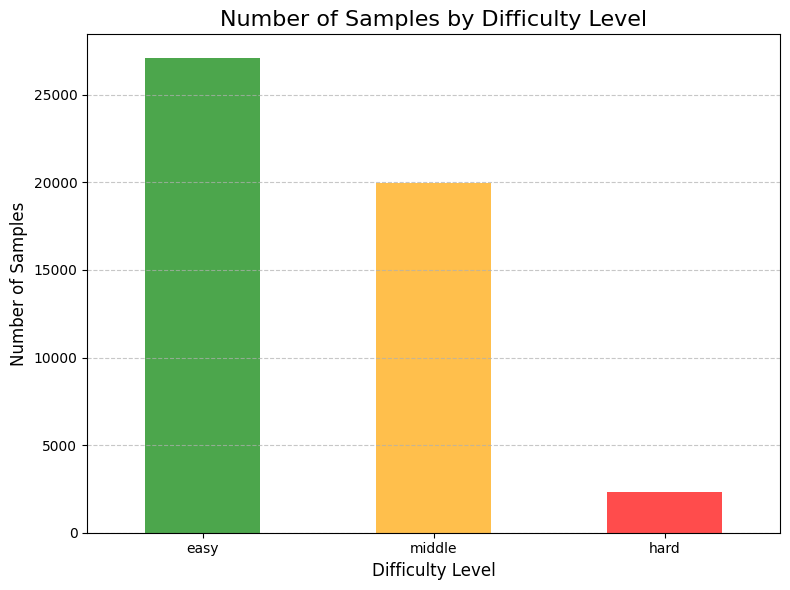

In [3]:
import matplotlib.pyplot as plt

# 确保按照 easy, middle, hard 的顺序排列
difficulty_order = ['easy', 'middle', 'hard']
difficulty_counts = df['difficulty'].value_counts().reindex(difficulty_order)

# 绘制柱状图可视化
plt.figure(figsize=(8, 6))
difficulty_counts.plot(kind='bar', color=['green', 'orange', 'red'], alpha=0.7)
plt.title('Number of Samples by Difficulty Level', fontsize=16)
plt.xlabel('Difficulty Level', fontsize=12)
plt.ylabel('Number of Samples', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()